# Question 4
### How does the prevalence of inadequate sleep vary across different demographic groups, such as sex, education, mental health and socioeconomic status, among the adult population in the US?

---

+ We will begin by doing a simple EDA to visualise difference in distributions for each of the demographic groups defined. 
+ We'll see if there's statistical evidence stating that there is inadequate sleep difference in these categories through an ANOVA t-student test.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [25]:
data = pd.read_csv('final_sample.csv')

We have defined the following lists of variables: 
+ Relevant Vars indicate the variables most associated with our question 
+ Additional Vars will help us dive deeper in case we see that the degree of inadequate sleep does not vary over our core factors. 
+ For a more extensive exploration, we have selected the variables relating to health as we could find out that some health conditions could affect sleeping patterns. 

In [30]:
relevant_vars = ['sleptim1', 'sex', 'income2', 'educa', 'employ1', 'menthlth']
additional_vars = ['marital', 'children', 'internet']
health_vars = ['medcost', 'htlhpln1', 'bphigh4', 'diabete3', 'asthma3', 'diff_walk']

## **EDA**

1. [Descriptive Statistics for Sleep Time](#eda-section1)

<a id='eda-section1'></a>
### Descriptive Statistics for Sleep Time

In [31]:
data['sleptim1'] = data['sleptim1'].round()
sleep_time_summary = data['sleptim1'].value_counts(normalize=True)*100
formatted_sleep_percentage = sleep_time_summary.map('{:.2f}%'.format)
sleep_time_stats = data['sleptim1'].describe()

print(f"Sleep Time Distribution and Statistics:\nSleep Time Sample Distribution:\n{'='*10}\n{formatted_sleep_percentage}\n\nSleep Time Stats:\n{'='*10}\n{sleep_time_stats}")

Sleep Time Distribution and Statistics:
Sleep Time Sample Distribution:
sleptim1
7.0     32.16%
8.0     27.87%
6.0     22.56%
5.0      6.95%
9.0      4.36%
4.0      2.85%
10.0     2.36%
3.0      0.74%
11.0     0.14%
Name: proportion, dtype: object

Sleep Time Stats:
count    18000.000000
mean         6.962611
std          1.251652
min          3.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         11.000000
Name: sleptim1, dtype: float64


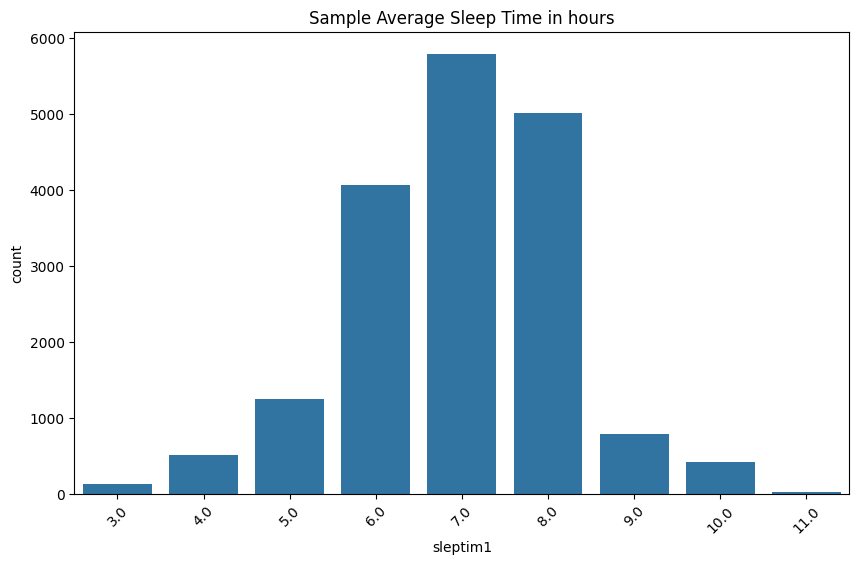

In [32]:
# Plot distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sleptim1')
plt.title(f"Sample Average Sleep Time in hours")
plt.xticks(rotation=45)
plt.show()

We can observe from the bar chart that we seem to follow a pretty normal distribution of values. There is a very slight left skew in our data. However, there doesn't seem to be many biases throughout the entire sample. And the sample has a mean sleep time of 6.96 hours! That's great

#### Analysis of the other factors relating to sleep time
* Sex
* Income level 
* Education
* Employment
* Mental Health

In [50]:
data_prev = data[['sex', 'income2', 'educa', 'employ1', 'menthlth']]
data_prev.head()

,sex,income2,educa,employ1,menthlth
0,Female,"Less than $50,000",College 4 years or more (College graduate),Employed for wages,0.0
1,Female,"Less than $15,000",College 4 years or more (College graduate),Retired,4.0
2,Female,"$75,000 or more",College 1 year to 3 years (Some college or tec...,Retired,0.0
3,Female,"$75,000 or more",Grade 12 or GED (High school graduate),Out of work for 1 year or more,0.0
4,Female,unknown,College 4 years or more (College graduate),Retired,5.0


In [51]:
def analyze_proportions_and_sleep(df, columns, sleep_column='sleptim1', plot=True):
    """
    This function calculates the proportion of each category within specified columns
    and explores their relationship with the sleep duration variable. Optionally,
    it can also plot these proportions and checks variable types to ensure that
    descriptive statistics are only calculated for numeric data.

    Parameters:
        df (pd.DataFrame): The dataset containing the columns.
        columns (list): List of column names to analyze.
        sleep_column (str): The name of the column containing sleep duration data.
        plot (bool): Whether to plot the proportions for each category.

    Returns:
        dict: A dictionary containing dataframes for each column with the proportions of each category
              and, if numeric, basic statistics on sleep duration for those categories.
    """
    results = {}
    
    for column in columns:
        # Calculate the proportion of each category
        category_counts = df[column].value_counts(normalize=True).reset_index()
        category_counts.columns = [column, 'proportion']
        category_counts['proportion'] = category_counts['proportion'] * 100  # Convert to percentage
        
        # Store proportions in the results dictionary
        results[column] = {'Proportions': category_counts}

        # Check if the column is numeric before calculating descriptive statistics
        if pd.api.types.is_numeric_dtype(df[column]):
            sleep_stats = df.groupby(column)[sleep_column].describe()
            results[column]['Sleep Stats'] = sleep_stats
        
        # Plotting
        if plot:
            plt.figure(figsize=(10, 5))
            plt.bar(category_counts[column].astype(str), category_counts['proportion'], color='skyblue')
            plt.xlabel(column)
            plt.ylabel('Percentage')
            plt.title(f'Proportion of {column}')
            plt.show()
    
    return results

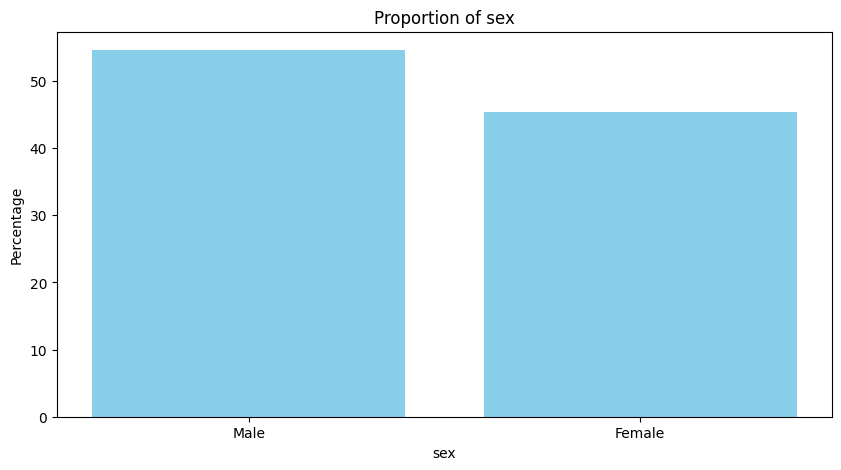

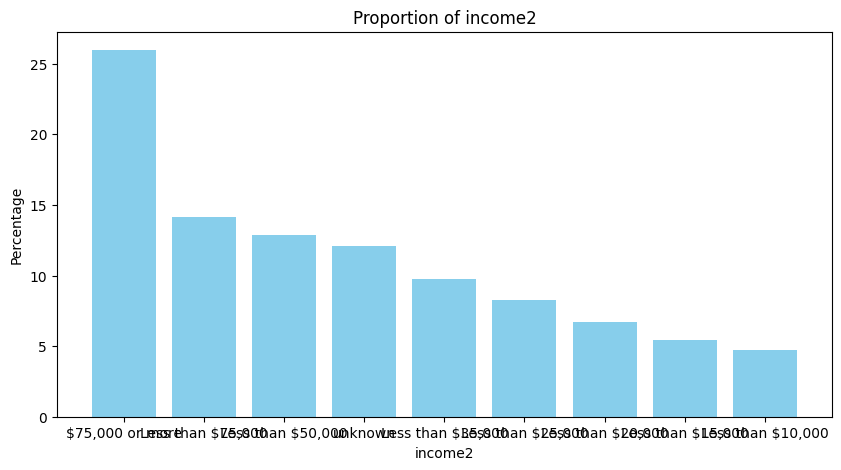

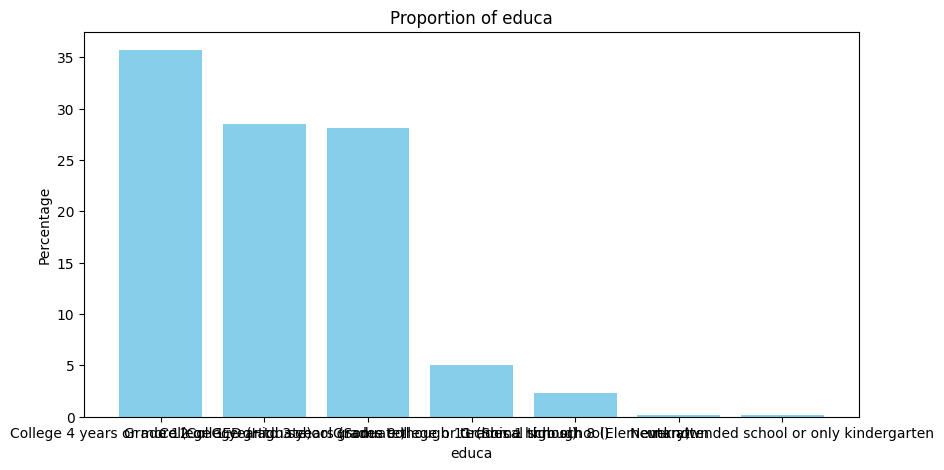

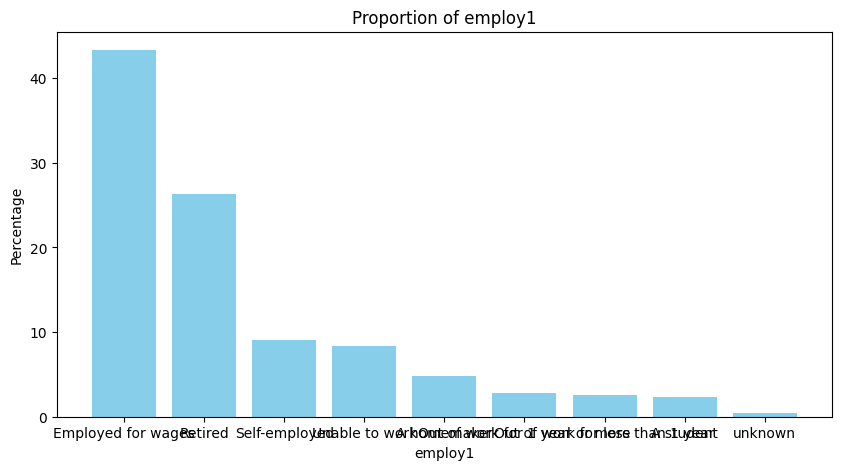

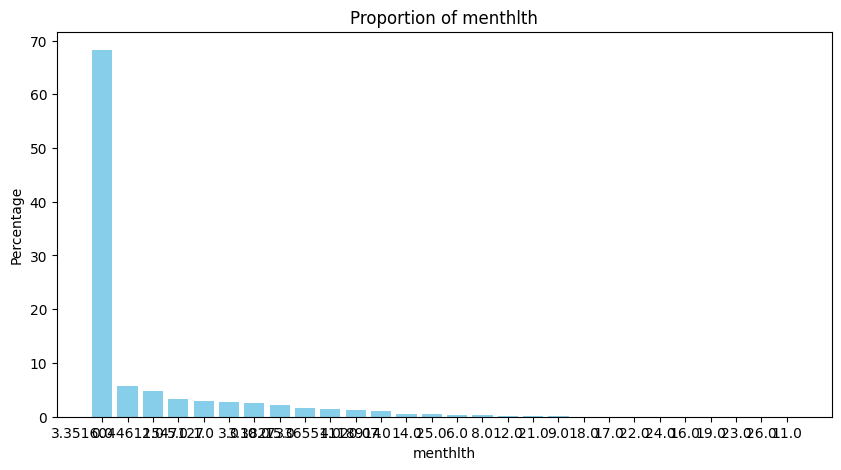

{'sex': {'Proportions':       sex  proportion
0    Male   54.622222
1  Female   45.377778}, 'income2': {'Proportions':              income2  proportion
0    $75,000 or more   25.972222
1  Less than $75,000   14.116667
2  Less than $50,000   12.872222
3            unknown   12.066667
4  Less than $35,000    9.772222
5  Less than $25,000    8.300000
6  Less than $20,000    6.722222
7  Less than $15,000    5.427778
8  Less than $10,000    4.750000}, 'educa': {'Proportions':                                                educa  proportion
0         College 4 years or more (College graduate)   35.700000
1             Grade 12 or GED (High school graduate)   28.516667
2  College 1 year to 3 years (Some college or tec...   28.094444
3              Grades 9 though 11 (Some high school)    5.000000
4                    Grades 1 through 8 (Elementary)    2.355556
5                                            unknown    0.211111
6         Never attended school or only kindergarten    0.122222}, 'e

In [53]:
columns_of_interest = ['sex', 'income2', 'educa', 'employ1', 'menthlth']
results = analyze_proportions_and_sleep(data, columns_of_interest)
print(results)